In [102]:
import pandas as pd
import numpy as np
from sklearn.utils import resample   # import resample method
from sklearn.preprocessing import StandardScaler    # import standardize method
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold    # import cross-validation method
from sklearn.ensemble import RandomForestClassifier, VotingClassifier    # import random forest and majority vote method
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score    # import evaluation method
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN    # import resample method to handle with imblanced data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. The imformation from data

In [103]:
df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.1 To see if there exists missing value

In [104]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 1.2 Describe the data

In [105]:
print("Fraudulent")
print(df.Amount[df.Class == 1].describe())
print()
print("Non-Fradulent")
print(df.Amount[df.Class == 0].describe())

Fraudulent
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fradulent
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## 1.3 See the possible relationship between the default amount /time and the class label

### 1.3.1 The relationship with default time

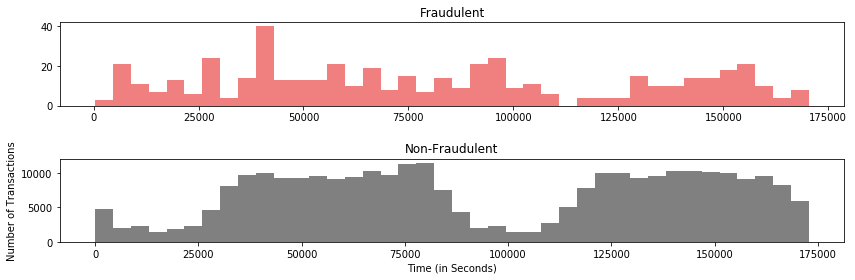

In [106]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = [12,4])

ax1.hist(df.Time[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Time[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


### 1.3.2 The relationship with default amount

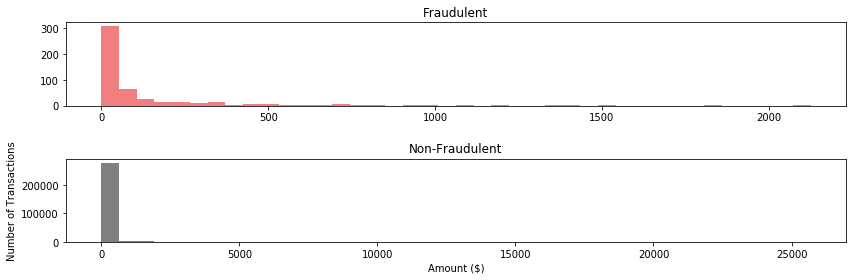

In [107]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = [12,4])

ax1.hist(df.Amount[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Amount[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


#### Remark: From this figure, we can find that fraudulent happened with small amount of transactions frequently. The smaller the amount is, the higher frequency of fraudulent. 

### 1.3.3 Scaling the data

#### To eliminate the infulence of different variables' scale, we will standardize the data now.

In [108]:
# Variable 'Amount' transform into 'normAmount'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))

# Drop 'Time' and 'Amount'
df = df.drop(['Time','Amount'],axis=1)
df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 1.4 Look into the distribution of two classes

Text(0,0.5,'Frequency')

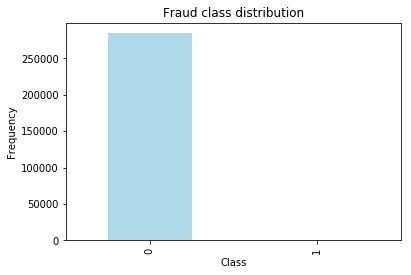

In [109]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color='lightblue')
plt.title("Fraud class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### The above figure shows that the orignial data is highly imbalanced. So we need to do some resampleing method to handle this problem.

# 2. Data processing
#### We will try SMOTE algorithm to do oversampling.

## 2.1 Split the data
#### 2.1.1 We use 30% of the data do the testing.

In [110]:
def data_prepration(x): 
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]           
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)
print(pd.value_counts(data_test_y['Class']))

length of training data
199364
length of test data
85443
0    85282
1      161
Name: Class, dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### 2.1.2 Use the SMOTE (oversampling)

In [111]:
os = SMOTE(random_state=0) 
os_data_X,os_data_y=os.fit_sample(data_train_X.values,data_train_y.values.ravel())

#### 2.1.3 Check the distribution now

In [112]:
from __future__ import division  
columns = data_train_X.columns
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
print(len(os_data_X))
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])

398066


#### 2.1.4 Check the data after sampling

In [113]:
print("Length of oversampled data is:",len(os_data_X))
print("Number of normal transcation:",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation:",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is:",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is:",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

Length of oversampled data is: 398066
Number of normal transcation: 199033
Number of fraud transcation: 199033
Proportion of Normal data in oversampled data is: 0.5
Proportion of fraud data in oversampled data is: 0.5


#### The above shows that the data is balaced after resampling.

## 2.2 Load the resampled trainning data and original test data into csv file

In [116]:
newtraindata=pd.concat([os_data_X,os_data_y],axis=1)
newtestdata=pd.concat([data_test_X,data_test_y],axis=1)
newtraindata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_train.csv',sep=',')
newtestdata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_test.csv',sep=',')